# Breast Cancer Prediction

This project will use classification models (Logistic Regression, Random Forest Classifier, and Support Vector Machine) to predict a malignant or benign tumor based on features used from [this](https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset?resource=download) Kaggle dataset.

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## Prepare the Data

In [2]:
df = pd.read_csv('breast-cancer.csv', header=0)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df.drop('id', axis=1, inplace=True)
df['diagnosis'] = df['diagnosis'].replace('M', 1)
df['diagnosis'] = df['diagnosis'].replace('B', 0)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [5]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Explore the Data

In [6]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [7]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


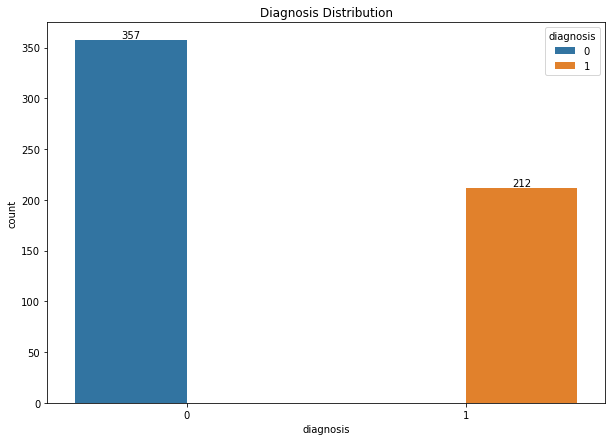

In [8]:
f, ax = plt.subplots(figsize=(10, 7))
ax = sns.countplot(x=df['diagnosis'], hue=df['diagnosis'], palette="tab10")
ax.set_title('Diagnosis Distribution')
for container in ax.containers:
    ax.bar_label(container)

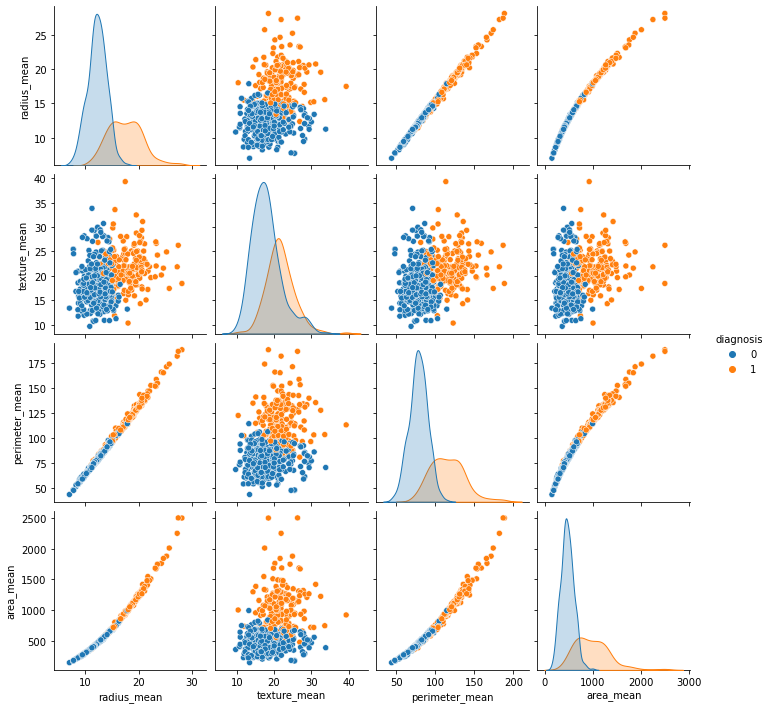

In [9]:
sns.pairplot(df.iloc[:,:5], hue='diagnosis')

<AxesSubplot:title={'center':'Correlation Heatmap'}>

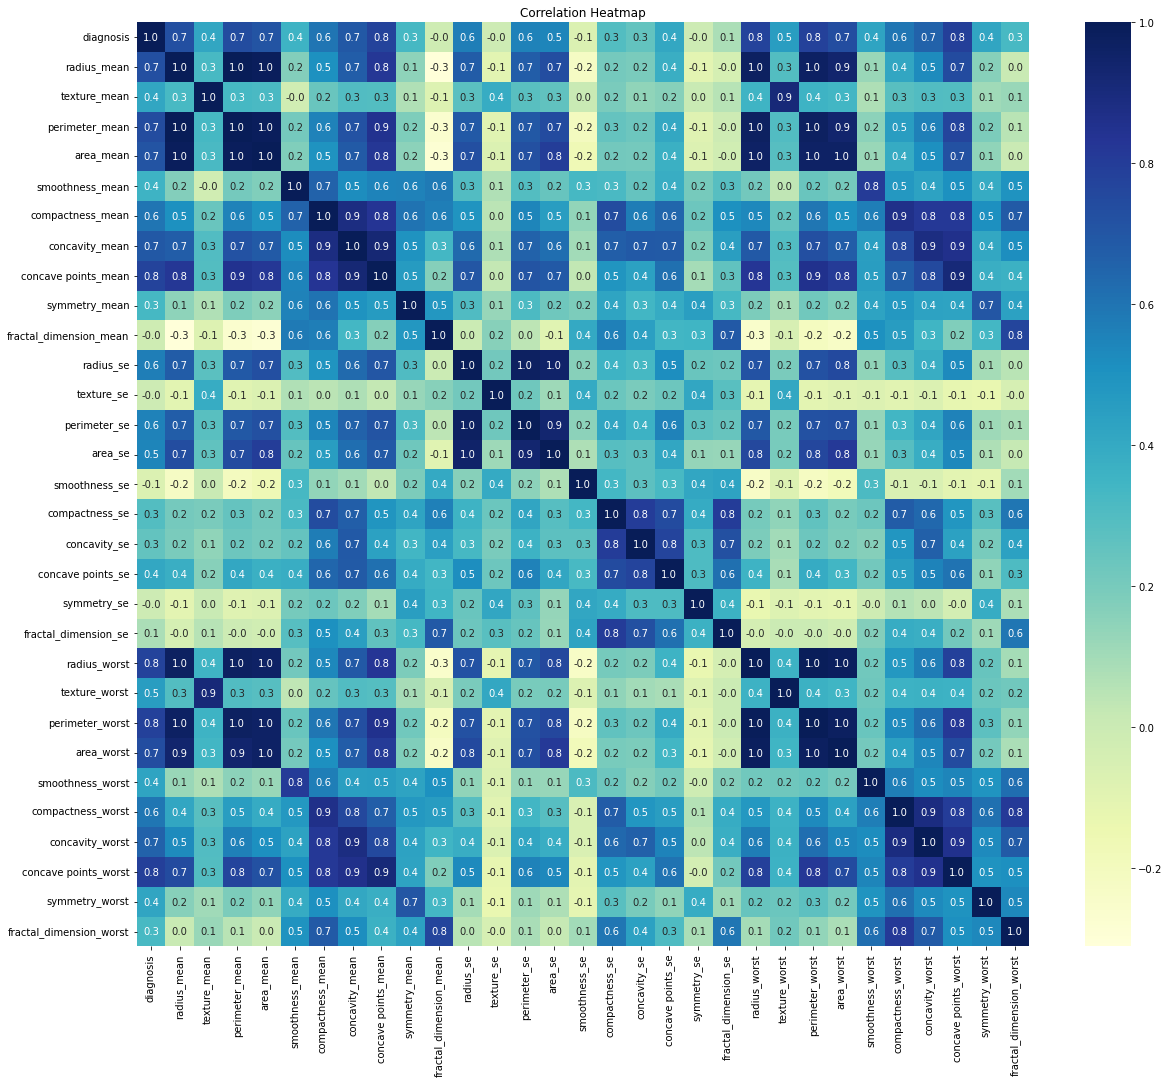

In [10]:
#Correlations
corr = df.corr()
f, ax = plt.subplots(figsize=(20, 17))
plt.title('Correlation Heatmap')
sns.heatmap(corr, annot=True, fmt=".1f", cmap="YlGnBu")

## Building a Classification Model

In [11]:
#Split into independent X variables and dependent Y variables
X = df.drop(['diagnosis'], axis=1)
y = df['diagnosis']
print("X:", X.shape)
print("Y:", y.shape)

X: (569, 30)
Y: (569,)


In [12]:
#Create a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42, shuffle=True)

In [13]:
#Feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [14]:
#Create a classification model
def classification_model(m, X_train, y_train):
    model = m.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    accuracy = metrics.accuracy_score(predictions, y_test)
        
    cm = confusion_matrix(y_test, predictions)
    
    f, ax = plt.subplots(figsize=(8, 6))
    ax = sns.heatmap(cm, annot=True, cmap="Blues")
    ax.set_title('Confusion Matrix')
    
    plt.show()
    
    print('Accuracy score: %s' % '{0:.2%}\n'.format(accuracy))   
    print(classification_report(y_test, predictions))

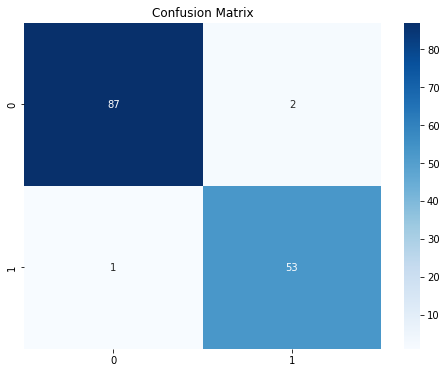

Accuracy score: 97.90%

              precision    recall  f1-score   support

           0       0.99      0.98      0.98        89
           1       0.96      0.98      0.97        54

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [15]:
#Logistic Regression Model
m = LogisticRegression()
classification_model(m, X_train, y_train)

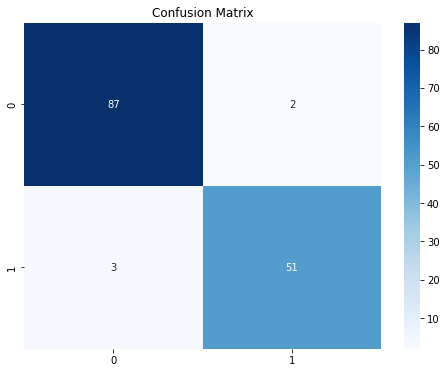

Accuracy score: 96.50%

              precision    recall  f1-score   support

           0       0.97      0.98      0.97        89
           1       0.96      0.94      0.95        54

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143



In [16]:
#Random Forest Classifier Model
m = RandomForestClassifier(n_estimators=100)
classification_model(m, X_train, y_train)

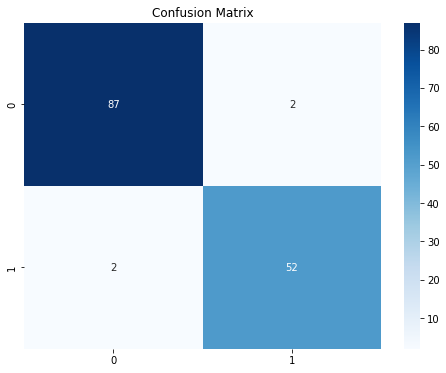

Accuracy score: 97.20%

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        89
           1       0.96      0.96      0.96        54

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [17]:
#Support Vector Machine Model
m = SVC(kernel='linear')
classification_model(m, X_train, y_train)

## Predicting Probability Estimates

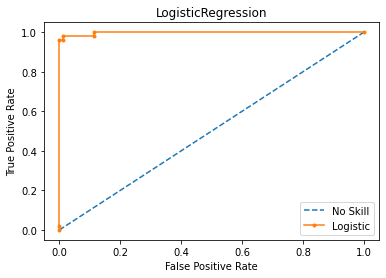

Accuracy score: 94.41%

              precision    recall  f1-score   support

           0       0.99      0.92      0.95        89
           1       0.88      0.98      0.93        54

    accuracy                           0.94       143
   macro avg       0.94      0.95      0.94       143
weighted avg       0.95      0.94      0.94       143



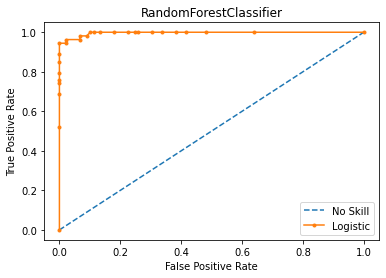

Accuracy score: 90.91%

              precision    recall  f1-score   support

           0       1.00      0.85      0.92        89
           1       0.81      1.00      0.89        54

    accuracy                           0.91       143
   macro avg       0.90      0.93      0.91       143
weighted avg       0.93      0.91      0.91       143



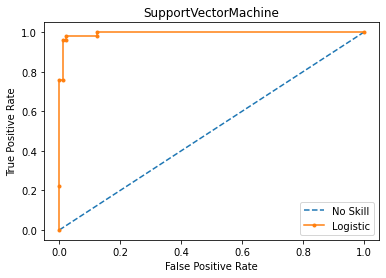

Accuracy score: 94.41%

              precision    recall  f1-score   support

           0       0.99      0.92      0.95        89
           1       0.88      0.98      0.93        54

    accuracy                           0.94       143
   macro avg       0.94      0.95      0.94       143
weighted avg       0.95      0.94      0.94       143



In [18]:
models = [LogisticRegression(), RandomForestClassifier(), SVC(kernel='linear', probability=True)]
for model in models:
    
    model.fit(X_train, y_train)

    yhat = model.predict_proba(X_test)
    yhat = yhat[:, 1]
    
    fpr, tpr, thresholds = roc_curve(y_test, yhat)

    plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
    plt.plot(fpr, tpr, marker='.', label='Logistic')

    plt.title(f'{model}'.replace('()', '').replace("(kernel='linear', probability=True)", '').replace('SVC', 'SupportVectorMachine'))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()

    plt.show()
    
    y_preds = []

    for y in yhat:
        if y < 0.20:
            y_preds.append(0)
        if y >= 0.20:
            y_preds.append(1)
            
    accuracy = metrics.accuracy_score(y_preds, y_test)
    print('Accuracy score: %s' % '{0:.2%}\n'.format(accuracy))   
    print(classification_report(y_test, y_preds)) 

# Conclusion

By using probability estimates, we were able to use a different decision threshold. Although our previous accuracy scores were higher for our classification models, estimating the probability of the binary outcome allowed us to increase the recall score to 100% for malignant tumors in the Random Forest Classifier model. In this case, recall is more essential due to the cost of inaccurately identifying a malignant tumor being greater than inaccurately identifying a benign tumor.